In [16]:
from auto_diagnostic.tfidf import TFIDF
from auto_diagnostic.lemmatization import Lemmatization
from auto_diagnostic.preprocess import tokenize

from dataloader.makedata import Dataloader

In [17]:
tfidf = TFIDF()
df = Dataloader().make_csv()
tokenized = tokenize(df['text_column'])
model = Lemmatization()
lemmatized_list = model.lemmatize(tokenized)
word_set = tfidf.get_wordset_from_text(lemmatized_list)
tfidf_vectors = tfidf.tf_idf()
closest = tfidf.get_closest_neighbors(vectors=tfidf_vectors)
print(closest)


[nltk_data] Downloading package stopwords to /home/aizen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field][i]=unidecode.unidecode(df[text_field].iloc[i])

/home/aizen/dev/atlantico-academy/cognitive-comp/auto-diagnostic/dataloader/makedata.py:33: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[()\;\,\%\-\/\--\.!?@\'\`\"\_\n]", " ")



2022-05-19 01:30:00 INFO: Loading these models for language: pt (Portuguese):
| Processor | Package |
-----------------------
| tokenize  | bosque  |
| mwt       | bosque  |
| lemma     | bosque  |

2022-05-19 01:30:00 INFO: Use device: gpu
2022-05-19 01:30:00 INFO: Loading: tokenize
2022-05-19 01:30:00 INFO: Loading: mwt
2022-05-19 01:30:00 INFO: Loading: lemma
2022-05-19 01:30:00 INFO: Done loading processors!


[{'key': (1, 'estimar', 0.018670539087829674), 'neighbors': [(0, 'brasil', 0.01318910204823724), (2, 'toracica', 0.016718011818646728), (3, 'etnia', 0.018670539087829674)]}, {'key': (3, 'etnia', 0.018670539087829674), 'neighbors': [(1, 'estimar', 0.018670539087829674), (2, 'toracica', 0.016718011818646728), (4, 'disseminacao', 0.018670539087829674), (5, 'pequeno', 0.015141629317420184)]}, {'key': (4, 'disseminacao', 0.018670539087829674), 'neighbors': [(2, 'toracica', 0.016718011818646728), (3, 'etnia', 0.018670539087829674), (5, 'pequeno', 0.015141629317420184), (6, 'questionavel', 0.018670539087829674)]}, {'key': (6, 'questionavel', 0.018670539087829674), 'neighbors': [(4, 'disseminacao', 0.018670539087829674), (5, 'pequeno', 0.015141629317420184), (7, 'figura', 0.017528383853722167), (8, 'amianto', 0.018670539087829674)]}, {'key': (8, 'amianto', 0.018670539087829674), 'neighbors': [(6, 'questionavel', 0.018670539087829674), (7, 'figura', 0.017528383853722167), (9, 'promovida', 0.018

In [18]:
closest

[{'key': (1, 'estimar', 0.018670539087829674),
  'neighbors': [(0, 'brasil', 0.01318910204823724),
   (2, 'toracica', 0.016718011818646728),
   (3, 'etnia', 0.018670539087829674)]},
 {'key': (3, 'etnia', 0.018670539087829674),
  'neighbors': [(1, 'estimar', 0.018670539087829674),
   (2, 'toracica', 0.016718011818646728),
   (4, 'disseminacao', 0.018670539087829674),
   (5, 'pequeno', 0.015141629317420184)]},
 {'key': (4, 'disseminacao', 0.018670539087829674),
  'neighbors': [(2, 'toracica', 0.016718011818646728),
   (3, 'etnia', 0.018670539087829674),
   (5, 'pequeno', 0.015141629317420184),
   (6, 'questionavel', 0.018670539087829674)]},
 {'key': (6, 'questionavel', 0.018670539087829674),
  'neighbors': [(4, 'disseminacao', 0.018670539087829674),
   (5, 'pequeno', 0.015141629317420184),
   (7, 'figura', 0.017528383853722167),
   (8, 'amianto', 0.018670539087829674)]},
 {'key': (8, 'amianto', 0.018670539087829674),
  'neighbors': [(6, 'questionavel', 0.018670539087829674),
   (7, 'figu

tamanho de node_sizes: 11
tamanho de edge_weights: 15


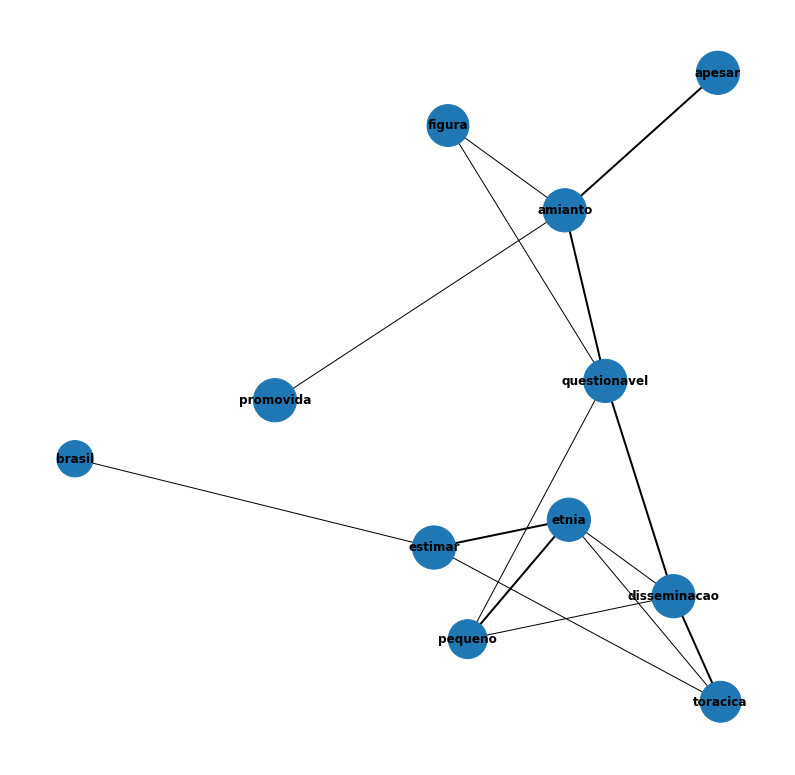

In [108]:
import networkx as nx
from matplotlib import pyplot as plt


plt.subplots(figsize=(14, 14))

G = nx.Graph()

for node in closest:

    node_key = node['key']
    close_nodes = node['neighbors']

    G.add_node(node_key[1])

    for n in close_nodes:
        G.add_node(n[1], size=n[2])
        G.add_edge(node_key[1], n[1], weight=abs(node_key[0] - n[0]))

node_sizes = nx.get_node_attributes(G, 'size')
edge_weights = nx.get_edge_attributes(G, 'weight')

print(f'tamanho de node_sizes: {len(list(node_sizes.values()))}')
print(f'tamanho de edge_weights: {len(list(edge_weights.values()))}')


pos = nx.spring_layout(G, k=0.5, iterations=20)

nx.draw(
    G,
    pos,
    with_labels=True,
    font_size=12,
    font_weight='bold',
    node_size=[n * 10**5 for n in node_sizes.values()],
    width=list(edge_weights.values())
)